In [1]:
import sys
sys.path.append("/home/marin/projects/mhac/build/release")
import mhac

In [2]:
%matplotlib inline
import random, copy, math
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def read_TSP_data(filepath="../../data/tsp/eil51.tsp"):
    cities = mhac.problems.tsp.Cities()

    with open(filepath, 'r') as infile:
        Name = infile.readline().strip().split()[1]
        FileType = infile.readline().strip().split()[1]
        Comment = infile.readline().strip().split()[1]
        Dimension = infile.readline().strip().split(":")[1]
        EdgeWeightType = infile.readline().strip().split()[1]
        infile.readline()

        for i in range(int(Dimension)):
            coords = infile.readline().strip().split()[1:]
            city = mhac.problems.tsp.City(int(coords[0]), int(coords[1]))
            cities.append(city)

    return cities

In [4]:
def displayTour(cities, solution):
    plt.figure(figsize = (16,8))
    N = len(cities)

    plt.axes()
    plt.plot([cities[solution[i % N]].x for i in range(N+1)], [cities[solution[i % N]].y for i in range(N+1)], 'bo-')
    plt.show()

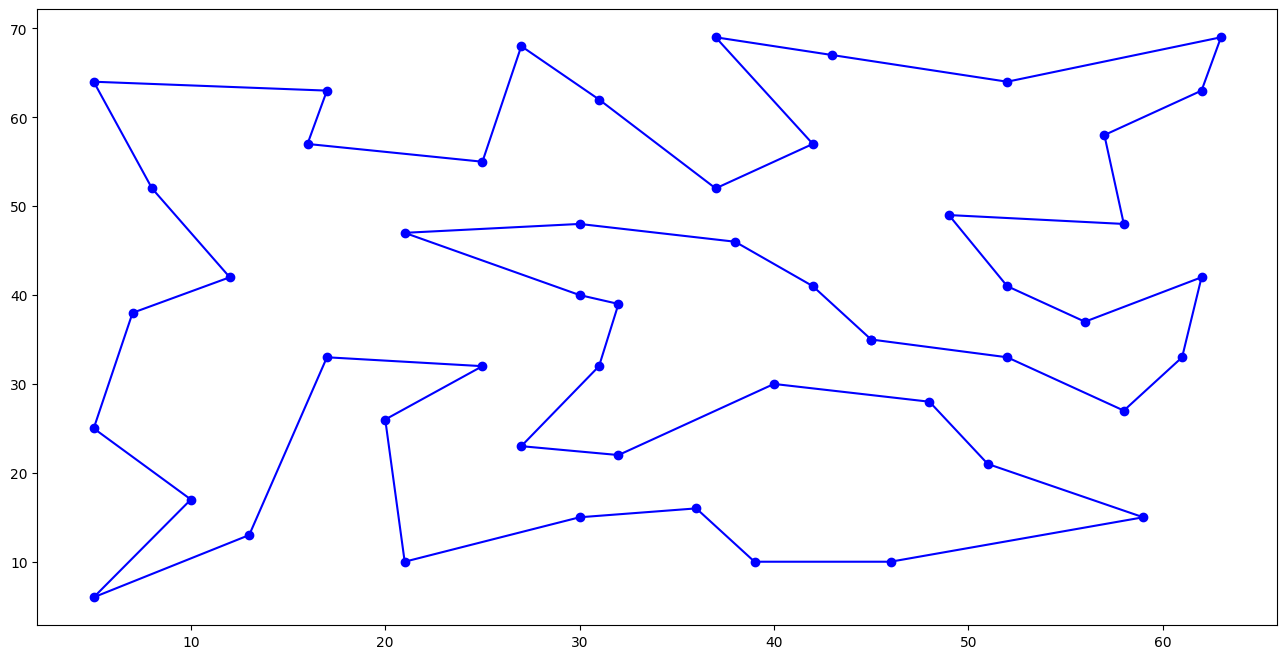

467.53759765625

In [5]:
problem = mhac.problems.tsp.TSP(read_TSP_data())
TS = mhac.math.TabuSearch(problem)
sol = TS.solve(1000, 10, 20)
displayTour(problem.cities, sol.tour)
sol.cost

In [6]:
def read_file_input(filepath):
    with open(filepath) as f:
        lines = f.readlines()
        sizes = [int(nr) for nr in lines[0].split()]
        m, n = sizes[0], sizes[1]
        arr = np.zeros((n, m))

        for i in range(1, len(lines)):
            arr[i-1, :] = [int(nr) for nr in lines[i].split()]

    return arr


arr = read_file_input("../../data/jss/imrg/ds1/testbed_1_s/t1s_0001.txt")
arr

array([[ 1., 68.],
       [59., 25.],
       [65., 46.],
       [28., 28.],
       [92., 93.]])

In [7]:
tm = mhac.problems.jss.TimeMatrix()

for time_list in arr.tolist():
    vint = mhac.VectorInt()
    for time in time_list:
        vint.append(int(time))
    tm.append(vint)

tm

In [8]:
problem = mhac.problems.jss.JSSP(tm)
TS = mhac.math.TabuSearch(problem)
sol = TS.solve(1000, 10, 20)
sol.schedule

VectorInt[3, 0, 1, 2, 4]

In [9]:
sol.cost

784.0